In [1]:
import sys 
sys.path.append('/mnt/share/vol001/radiomics')

In [25]:
import getopt
import os
import numpy as np
import view_classification as vc
import video_frames as vf
import doppler_segmentation as ds
import texture_analysis as tex
import textures_classification as tc


In [26]:
videos_path='/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546'
videos = os.listdir(videos_path)
videos

['VH018956H1_001125_20160415T105926.MP4',
 'VH018956H1_001125_20160415T105823.MP4',
 'VH018956H1_001125_20160415T105956.MP4',
 'VH018956H1_001125_20160415T105934.MP4',
 'VH018956H1_001125_20160415T105800.MP4',
 'VH018956H1_001125_20160415T105946.MP4',
 'VH018956H1_001125_20160415T105807.MP4',
 'VH018956H1_001125_20160415T105845.MP4',
 'VH018956H1_001125_20160415T105819.MP4',
 '._VH018956H1_001125_20160415T105926.MP4',
 'VH018956H1_001125_20160415T105837.MP4']

In [27]:
def segmentation_process(frames):
    segmentations = []
    anatomics = []
    for fr in frames:
        segmentedImage, anatomicImage = ds.segmentation(fr)
        segmentations.append(segmentedImage)
        anatomics.append(anatomicImage)
    return segmentations, anatomics
        

In [28]:
def texture_extraction(segmentations):
    allTextures = []
    for s in segmentations:
        if np.max(s) != 0:
            textures = tex.textures(s)
            allTextures.append(textures)
                
            # Calculate mean and median of the textures features plus max velocity of the sequence
            numberOfFeatures = len(allTextures[0])
            
            textureFeatures = np.zeros((1, numberOfFeatures*2 + 1))
            textureFeatures[0,:numberOfFeatures] = np.nanmean(np.array(allTextures), axis=0)
            textureFeatures[0,numberOfFeatures:-1] = np.nanmedian(np.array(allTextures), axis=0)
            textureFeatures[0,-1] = max(allTextures)[-2]
            
            return(textureFeatures)

In [29]:
def fullprocess2(videos_path):
    videos = os.listdir(videos_path)

    for v in videos:
        if not v.startswith('.'):
            file_path = os.path.join(videos_path, v)
            print('- Processing File:%s' %file_path)
            if vf.if_doppler(file_path):
                print('   + It is a doppler image')
                frames = vf.load_video(file_path)
                segmentations, anatomics = segmentation_process(frames)
                print('   + Segmentation completed')
                if vc.if_long_axis(anatomics):
                    textureFeatures = texture_extraction(segmentations)
                    print('   + Classification')
                    label = tc.classify(textureFeatures)[0] 
                
                    if label == 1:
                        print('RHD')
                    elif label == 0:
                        print('Normal')
                    else:
                        print('Unspecific label')


In [ ]:
fullprocess(videos_path)

In [ ]:
videos = os.listdir(videos_path)
v = videos[2]

In [124]:
def extract_and_anonymise(videos_path,input_v,videos_path_out,output_v):
    vfull_in=os.path.join(videos_path, input_v)
    print(vfull_in)
    frames = vf.load_video(vfull_in)
    index = 0
    for fr in frames:
        dimy, dimx, depth = fr.shape
        for i in range(0,int(dimy/6)):
            for j in range(int(2*dimx/3)-10,dimx):
                fr[i][j][0]=0
                fr[i][j][1]=0
                fr[i][j][2]=0
                
        directory=os.path.join(videos_path_out, output_v)
        if not os.path.exists(directory):
            os.makedirs(directory)

        vfull_out=os.path.join(directory, str(index)+'.png')
        index = index+1
        imagen=PIL.Image.fromarray(fr)
        imagen.save(vfull_out, 'png')

In [126]:
import hashlib

videos_path_out='/mnt/share/vol001/anonymised'
for v in videos:
    if not v.startswith('.'):
        file_path=os.path.join(videos_path, v)
        if vf.if_doppler(file_path):
            hash_object = hashlib.md5(file_path.encode())
            output_v=hash_object.hexdigest()
            extract_and_anonymise(videos_path,v,videos_path_out,output_v)
    
    

/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105823.MP4
/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105956.MP4
/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105934.MP4
/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105845.MP4
/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105819.MP4
/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105837.MP4


In [92]:
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np

In [93]:
def showarray(a, fmt='png'):
    #a = np.uint8(a)
    f = BytesIO()
    imagen=PIL.Image.fromarray(a)
    imagen.save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

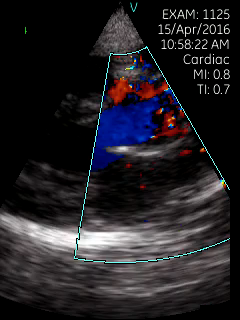

In [95]:
frames[0].shape
showarray(frames[0],'png')

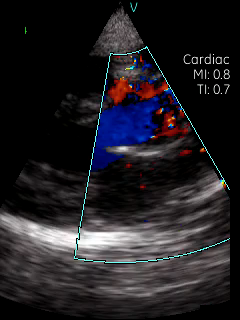

In [96]:
myframe=frames[0]
dimy, dimx, depth = myframe.shape
for i in range(0,int(dimy/6)):
    for j in range(int(2*dimx/3)-10,dimx):
        myframe[i][j][0]=0
        myframe[i][j][1]=0
        myframe[i][j][2]=0
showarray(myframe,'png')

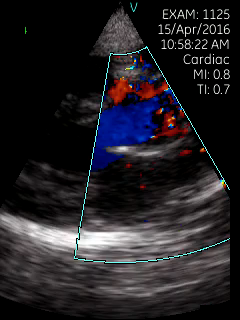

In [80]:
showarray(frames[0],'png')

In [19]:
def fullprocess(videos_path):
    videos = os.listdir(videos_path)

    for v in videos:
        if not v.startswith('.'):
            file_path = os.path.join(videos_path, v)
            
            print('- Processing File:%s' %file_path)
            # 1. If doppler, extract frames from video
            if vf.if_doppler(file_path):
                print('   + It is a doppler image')
                frames = vf.load_video(file_path)
                
                segmentations = []
                anatomics = []
                for fr in frames:
                    # 2. Segment colors by frame
                    segmentedImage, anatomicImage = ds.segmentation(fr)
                
                    segmentations.append(segmentedImage)
                    anatomics.append(anatomicImage)
                print('   + Segmentation completed')
                # 3. Classify view. If long axis, extract texture fetaures
                if vc.if_long_axis(anatomics):
                    allTextures = []
                    for s in segmentations:
                    
                        # 4. Texture analysis
                        print('        * Texturization')
                        if np.max(s) != 0:
                            textures = tex.textures(s)
                            allTextures.append(textures)
                    
                    # Calculate mean and median of the textures features plus max velocity of the sequence
                    numberOfFeatures = len(allTextures[0])
            
                    textureFeatures = np.zeros((1, numberOfFeatures*2 + 1))
                    textureFeatures[0,:numberOfFeatures] = np.nanmean(np.array(allTextures), axis=0)
                    textureFeatures[0,numberOfFeatures:-1] = np.nanmedian(np.array(allTextures), axis=0)
                    textureFeatures[0,-1] = max(allTextures)[-2]
            
                    # 5. Supervised classifier
                    print('   + Classification')
                    label = tc.classify(textureFeatures)[0] 
                
                    if label == 1:
                        print('RHD')
                    elif label == 0:
                        print('Normal')
                    else:
                        print('Unspecific label')

In [30]:
fullprocess(videos_path)

- Processing File:/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105926.MP4
- Processing File:/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105823.MP4
   + It is a doppler image
   + Segmentation completed
   + Classification
Normal
- Processing File:/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105956.MP4
   + It is a doppler image
   + Segmentation completed
- Processing File:/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105934.MP4
   + It is a doppler image
   + Segmentation completed
- Processing File:/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105800.MP4
- Processing File:/mnt/share/vol001/RHD-Sample/Normal/VH018956H1_001125_20160415T105546/VH018956H1_001125_20160415T105946.MP4
- Processing File:/mnt/share/vol001/RHD-Sample/Norma